In [203]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.io as pio
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


import warnings 
warnings.filterwarnings('ignore')


In [204]:
df = pd.read_csv("ElectricCarData_Clean.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [205]:
df['INR'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [206]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [207]:
df.shape

(103, 15)

In [208]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,Seats,PriceEuro,INR
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,0.951456,4.883495,55811.563107,4643.522050
std,3.017430,43.573030,126.014444,29.566839,0.215963,0.795834,34134.665280,2840.004151
min,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,20129.000000,1674.732800
25%,5.100000,150.000000,250.000000,168.000000,1.000000,5.000000,34429.500000,2864.534400
50%,7.300000,160.000000,340.000000,180.000000,1.000000,5.000000,45000.000000,3744.000000
75%,9.000000,200.000000,400.000000,203.000000,1.000000,5.000000,65000.000000,5408.000000
max,22.400000,410.000000,970.000000,273.000000,1.000000,7.000000,215000.000000,17888.000000


In [209]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
INR                0
dtype: int64

In [210]:
#Converting categorical variables to numbers
from sklearn.preprocessing import LabelEncoder
categorical = LabelEncoder()

In [211]:
col = ['RapidCharge','PowerTrain','FastCharge_KmH']
df['RapidCharge'] = categorical.fit_transform(df['RapidCharge'])

In [212]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,FWD,Type 2 CCS,Hatchback,C,5,45000,3744.0000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,AWD,Type 2 CCS,SUV,E,5,96050,7991.3600
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,AWD,Type 2 CCS,Hatchback,C,5,50000,4160.0000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,AWD,Type 2 CCS,Hatchback,C,5,65000,5408.0000


In [213]:
range = np.arange(1,104)

# Visualizing the number of brands that produce EVs

Text(0, 0.5, 'Frequency')

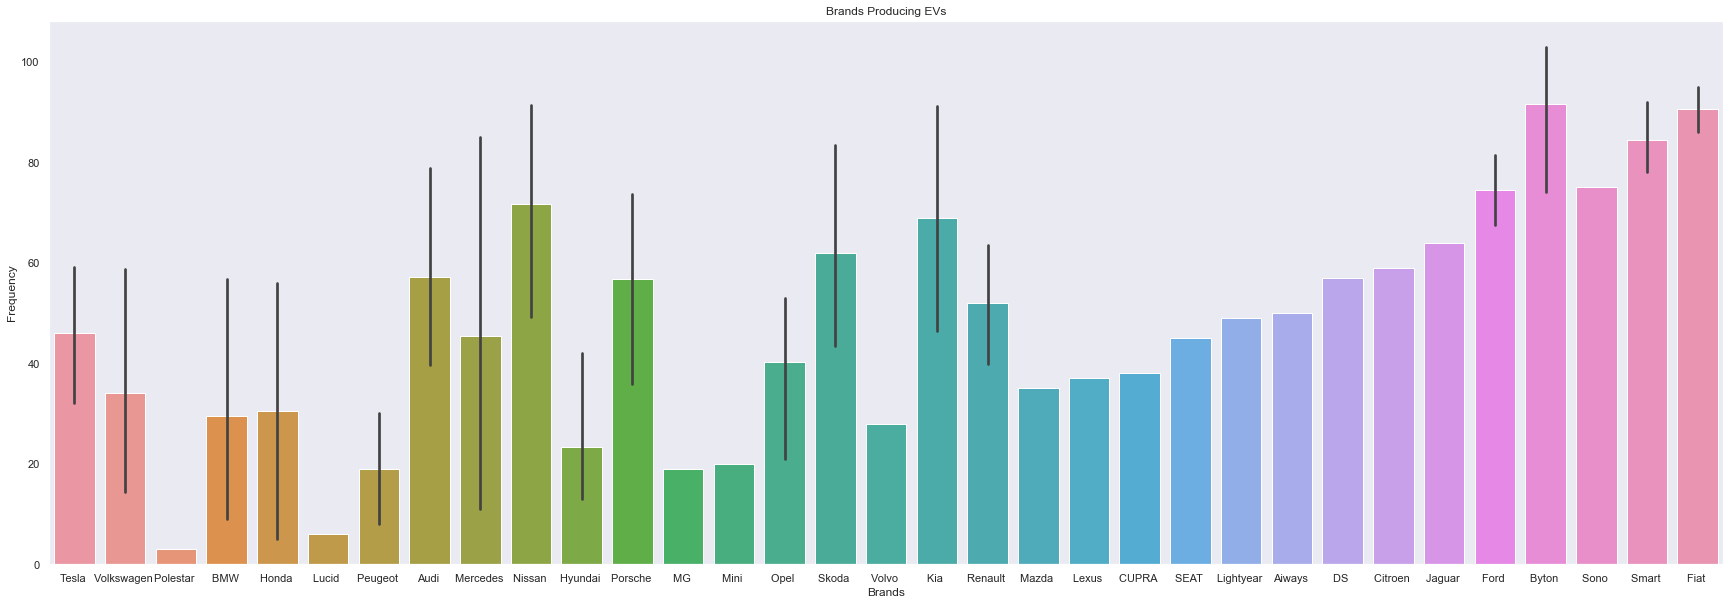

In [214]:
brands = plt.figure(figsize=(30,10))
sns.barplot(x='Brand',y=range,data=df)
plt.grid(axis='y')
plt.title("Brands Producing EVs")
plt.xlabel("Brands")
plt.ylabel("Frequency")

# Which car has top speed

In [215]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [216]:
df['TopSpeed_KmH'].mean()

179.19417475728156

# Which car has fastest accelaration?

Text(0, 0.5, 'Acceleration')

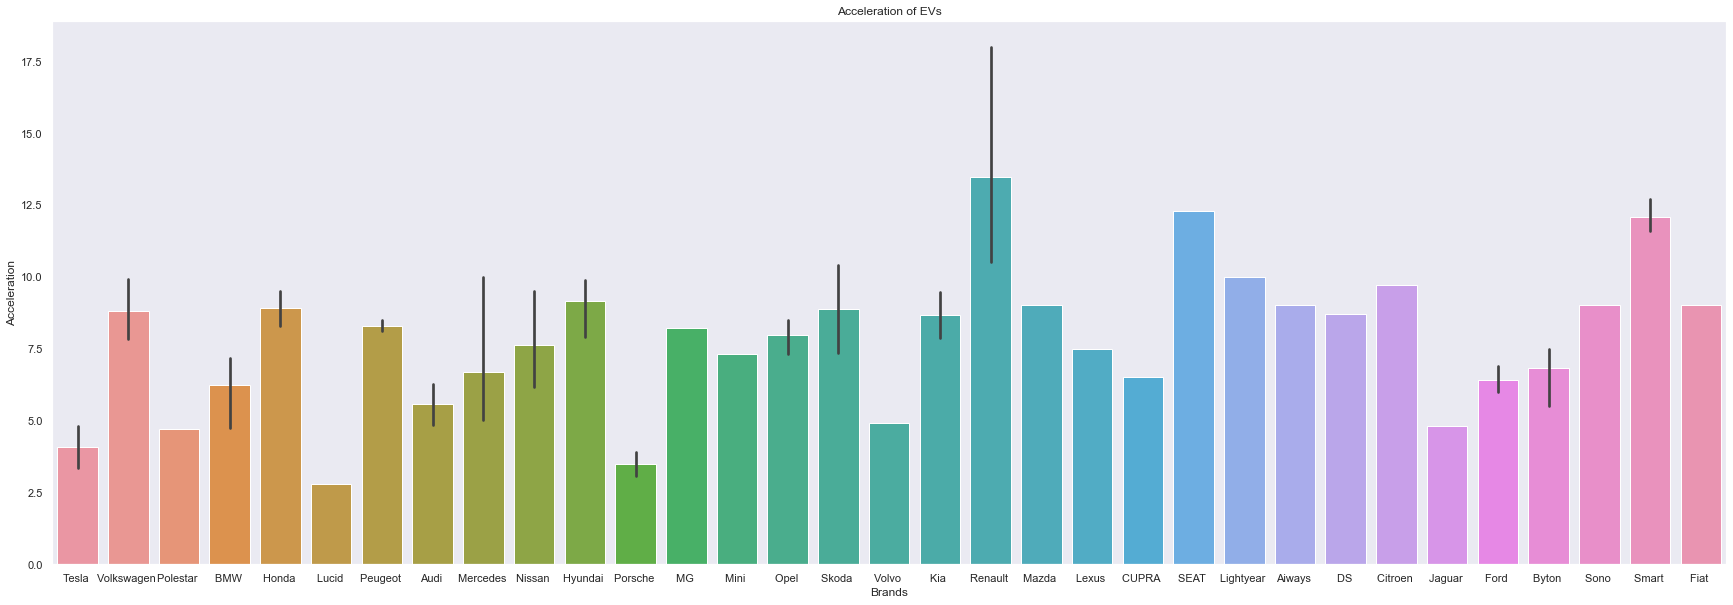

In [217]:
top_speed = plt.figure(figsize=(30,10))
sns.barplot(x='Brand',y='AccelSec',data=df)
plt.grid(axis='y')
plt.title("Acceleration of EVs")
plt.xlabel("Brands")
plt.ylabel("Acceleration")

In [218]:
df["AccelSec"].mean()

7.396116504854368

# Maximum range achived by a car

Text(0, 0.5, 'Range(Km)')

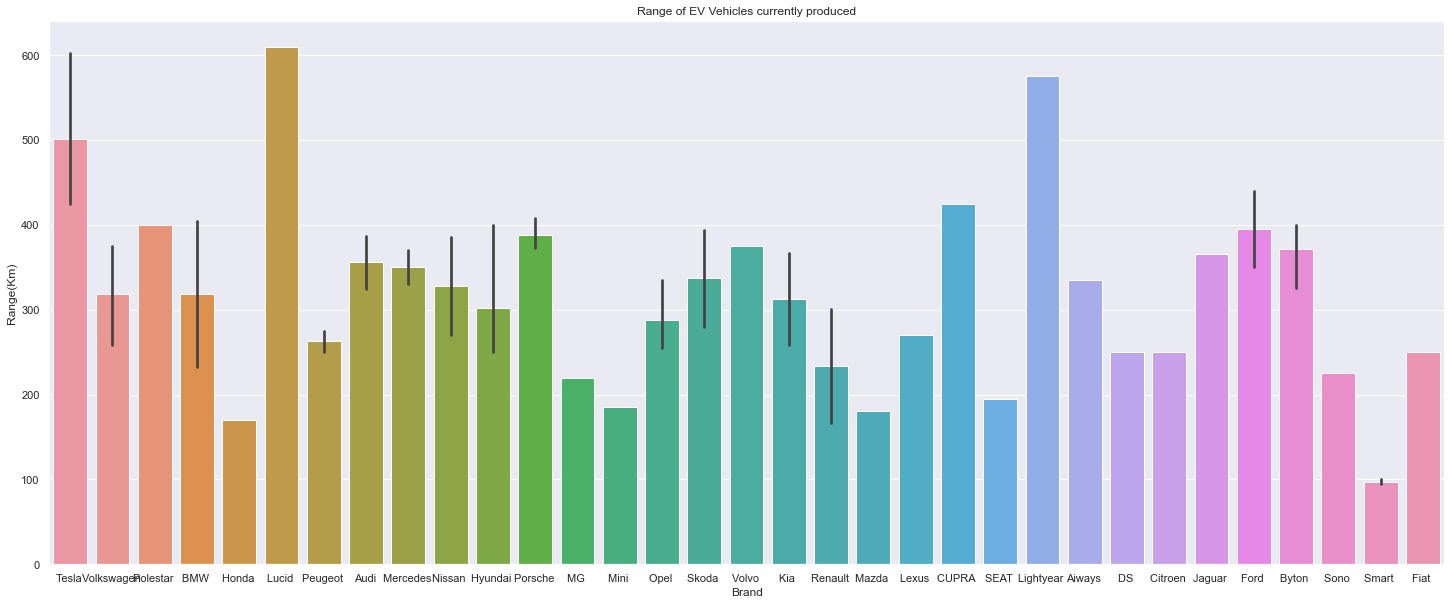

In [219]:
range = plt.figure(figsize=(25,10))
sns.barplot(x='Brand',y='Range_Km',data=df)
plt.title("Range of EV Vehicles currently produced")
plt.xlabel("Brand")
plt.ylabel("Range(Km)")


In [220]:
df['Range_Km'].mean()

338.7864077669903

# Car Efficiency

Text(0, 0.5, 'Efficiency')

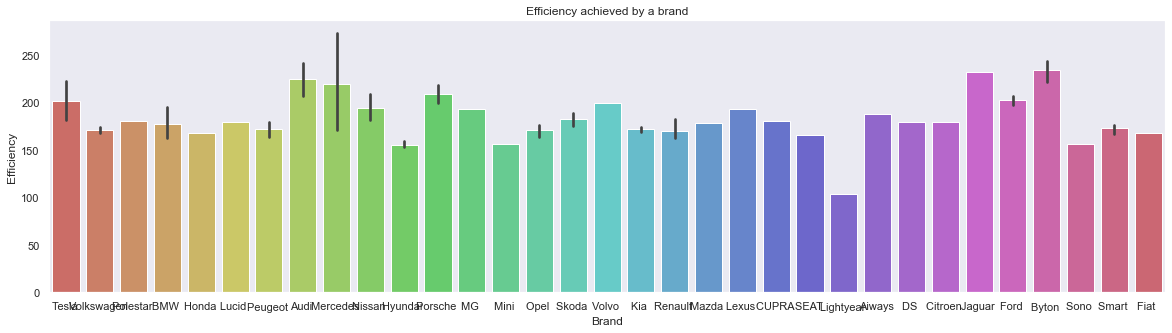

In [221]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')

# Number of seats in car

Text(0, 0.5, 'Seats')

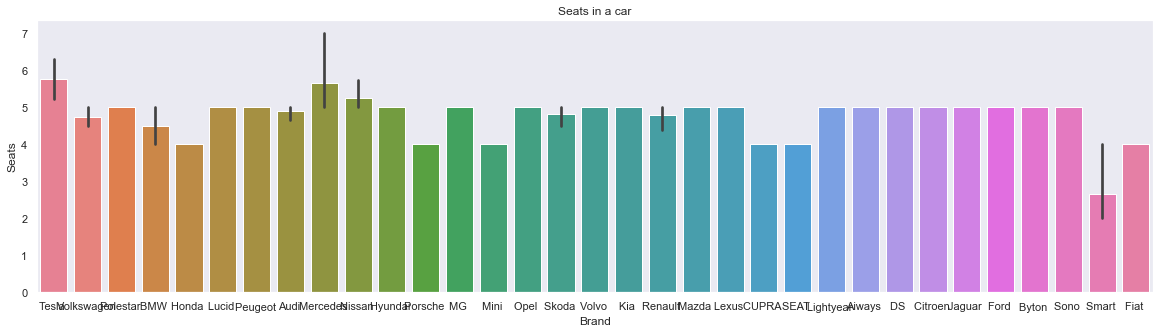

In [222]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')

# Cars and their body style

Text(0.5, 1.0, 'Body Style')

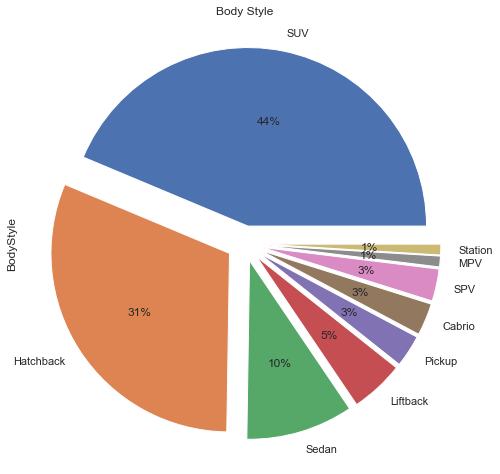

In [223]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

# Price of cars (in INR)

Text(0, 0.5, 'Frequency')

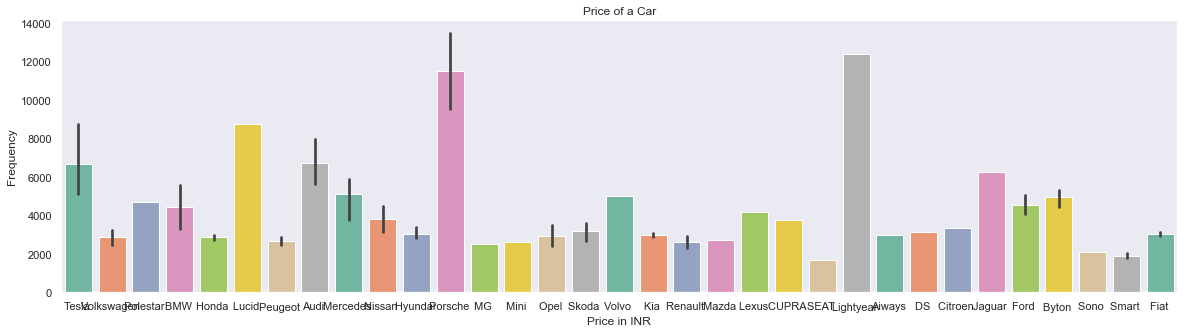

In [297]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='INR',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

# Segment in which the cars fall under

Text(0.5, 1.0, 'Segment')

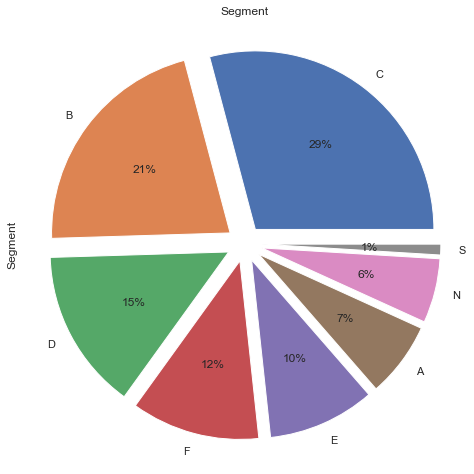

In [298]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type

# plug type

<AxesSubplot:ylabel='PlugType'>

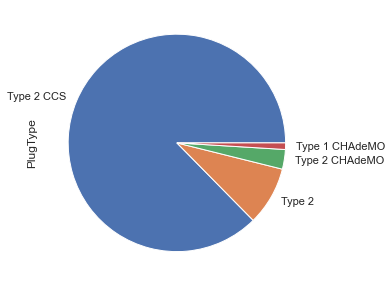

In [224]:
plug_type = plt.figure(figsize=(10,5))
df['PlugType'].value_counts().plot.pie()


- The pie chart shows that most EV producers use Type2 CCS cables


# Drive Train Affect on Range

Text(0, 0.5, 'Range(Km)')

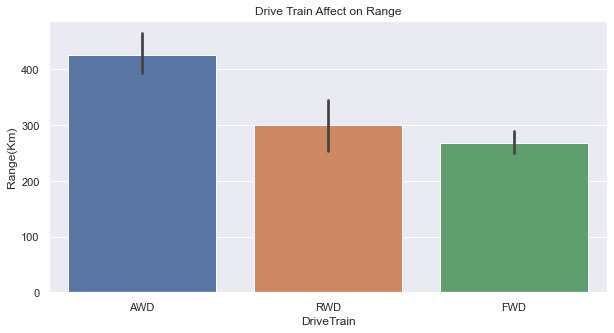

In [225]:
rng_dt = plt.figure(figsize=(10,5))
sns.barplot(data=df,x='PowerTrain',y='Range_Km')
plt.title("Drive Train Affect on Range")
plt.xlabel("DriveTrain")
plt.ylabel("Range(Km)")


# Heatmap to show the correlation of the data

<AxesSubplot:>

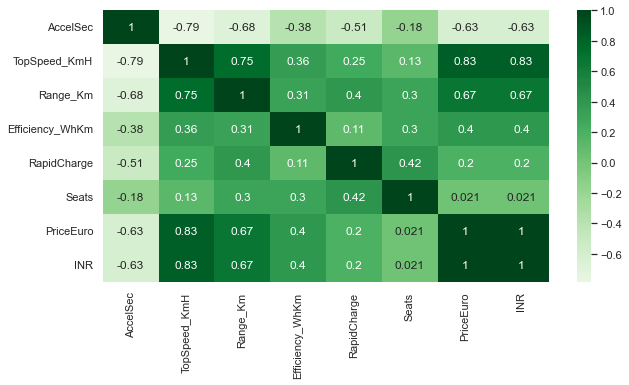

In [226]:
heatmap = plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), center=0,cmap = 'Greens',annot=True)

# Checking for normal distribution of data

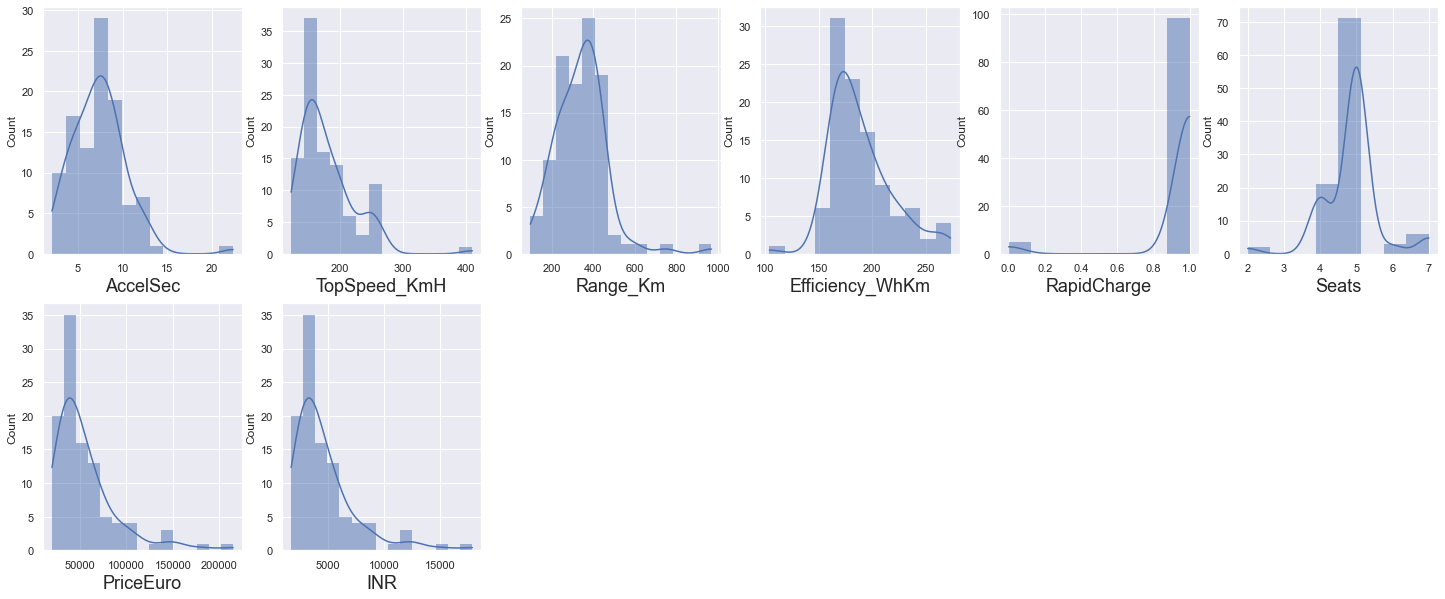

In [227]:
plt.figure(figsize=(25, 10))
col = 1

for i in df.columns:
    if df[i].dtype == "object":
        continue
    elif col<14:
        plt.subplot(2, 6, col)
        sns.histplot(df[i], kde=True, linewidth=0)
        plt.xlabel(i, y=-0.1, fontsize=18)
    col=col+1

# Regression

# Spliting the Feature And Target

In [228]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=21)


# Linear Regression

In [230]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [231]:
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score

# Finding out R-Squared value

In [251]:
r2=(r2_score(y_test,pred))
print(r2*100)

93.43913860065601


Around 93% of the dependant variable has been explained by the independant variables

# Logistic Regression

In [252]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [253]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [235]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# Confusion Matrix of the regression

In [236]:
confusion_matrix(y1_test, pred1)


array([[ 0,  1],
       [ 0, 20]], dtype=int64)

# Accuracy of the model

In [254]:
(20+0)/(0+1+0+21)*100

90.9090909090909

# Clustering

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

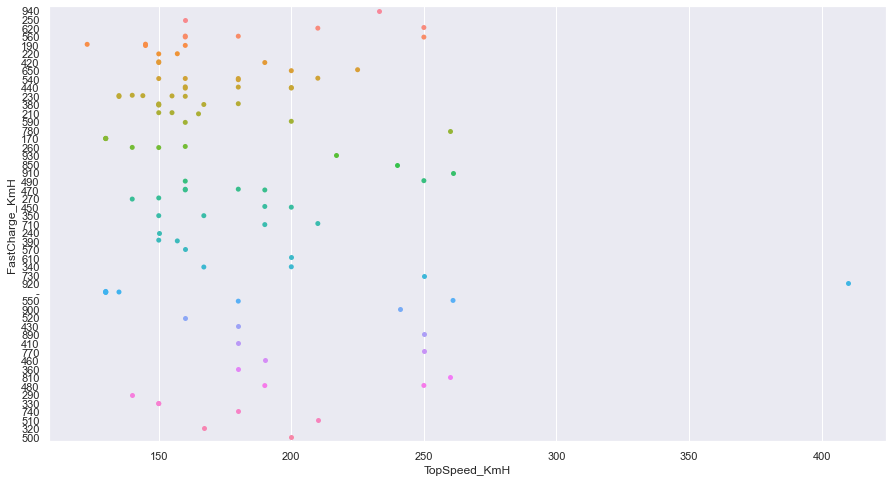

In [237]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

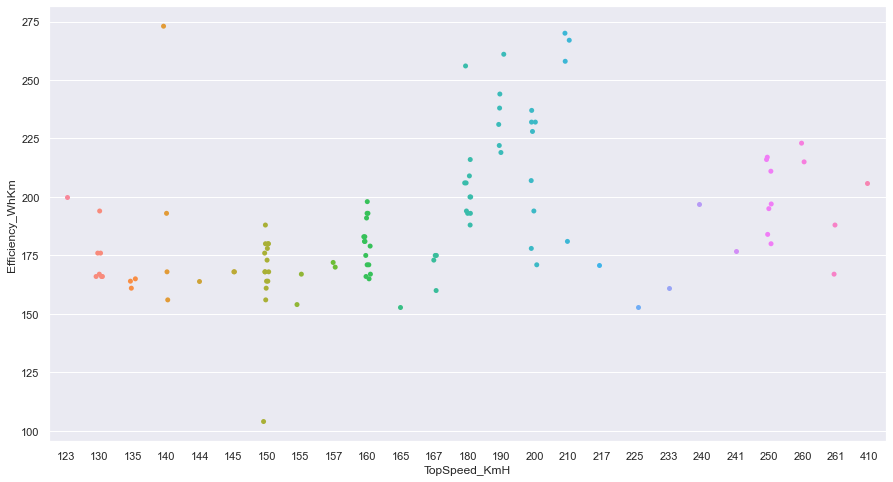

In [238]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

# Separating out the features

In [255]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'INR','PowerTrain']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [256]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.224529,0.353020,-1.172340,-0.227420,0.956940,-1.379811,0.309006,0.310442,-0.460404
1,-1.974424,-0.549435,-0.701227,0.556573,0.006968,0.525989,-0.436673,-0.130980,-0.288194
2,1.621019,0.060299,-0.414612,-0.474315,0.341439,-0.930066,0.184331,-0.009001,-0.121834
3,0.349006,-0.020691,-0.252694,1.596206,-0.520624,0.180619,-0.237423,0.558036,0.126995
4,-2.652187,0.262267,-0.744605,-0.016848,-0.999050,0.461889,-0.469053,0.024237,-0.135937
...,...,...,...,...,...,...,...,...,...
98,-0.304940,-0.437884,-0.069730,0.161721,-0.184879,-0.107721,0.187125,0.099246,0.115962
99,2.336610,0.114442,1.757848,-0.121440,-1.119992,-0.006020,-0.224293,0.317450,0.082739
100,0.750440,-0.218703,0.252519,-0.838994,-0.062858,-0.490966,-0.093426,-0.294197,-0.241560
101,1.511012,-0.199861,1.112363,-0.377564,-0.660675,-0.151851,0.142496,-0.379005,-0.063483


In [257]:
df_9=data2.iloc[:,:9]
df_9.head(5)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.224529,0.353020,-1.172340,-0.227420,0.956940,-1.379811,0.309006,0.310442,-0.460404
1,-1.974424,-0.549435,-0.701227,0.556573,0.006968,0.525989,-0.436673,-0.130980,-0.288194
2,1.621019,0.060299,-0.414612,-0.474315,0.341439,-0.930066,0.184331,-0.009001,-0.121834
3,0.349006,-0.020691,-0.252694,1.596206,-0.520624,0.180619,-0.237423,0.558036,0.126995
4,-2.652187,0.262267,-0.744605,-0.016848,-0.999050,0.461889,-0.469053,0.024237,-0.135937


# Dendrogram

In [292]:
from scipy.cluster.hierarchy import dendrogram, linkage

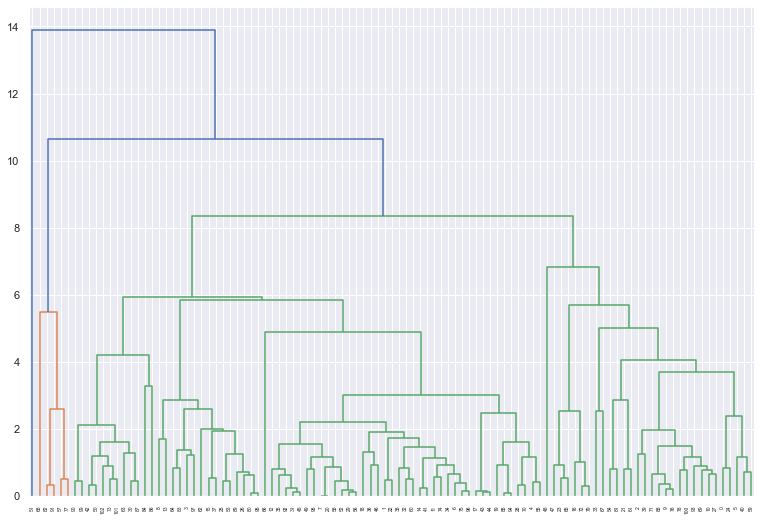

In [293]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

# Screenplot

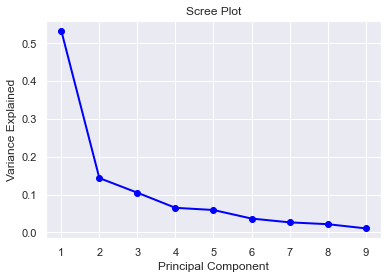

In [294]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Regression for PCA(Data2)

In [273]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['INR']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=21)
ls=LinearRegression().fit(X_train,y_train)

In [278]:
ls.intercept_

4643.522050485438

In [279]:
ls.coef_

array([1061.42554674,  920.77714129,  190.08894001, -264.41258254,
        185.54152362, 1652.17431742, -784.78832366, 1073.55879753,
       1172.29994606])

In [282]:
cof=pd.DataFrame(ls.coef_, X.columns, columns=['Coeff'])
cof

,Coeff
PC1,1061.425547
PC2,920.777141
PC3,190.088940
PC4,-264.412583
Pc5,185.541524
PC6,1652.174317
PC7,-784.788324
PC8,1073.558798
PC9,1172.299946


In [283]:
predict=ls.predict(X_test)
predict

array([ 3486.5792, 10400.    ,  2858.8352,  4877.184 ,  5408.    ,
        2999.9424,  2862.08  ,  5233.28  , 17888.    ,  2043.808 ,
        3744.    ,  4160.    ,  2432.2688,  6655.168 ,  3243.7184,
        5786.6432,  1832.896 ,  3744.    ,  2766.0672,  3170.336 ,
        1782.2272,  5781.0688,  6792.3648,  2912.    ,  3064.8384,
        2912.    ,  3120.    ,  5028.3584,  8565.024 ,  2635.8592,
        2496.    ])

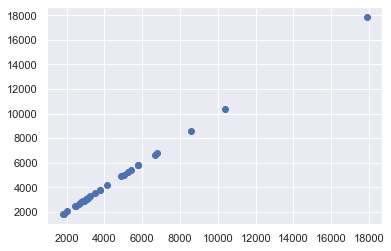

In [284]:
plt.scatter(y_test, predict)

<AxesSubplot:xlabel='INR', ylabel='Density'>

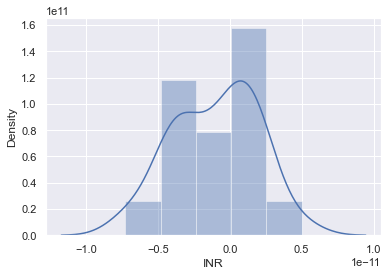

In [285]:
sb.distplot((y_test-predict))

In [289]:
from sklearn import metrics

In [291]:
print('MAE:',metrics.mean_absolute_error(y_test,predict))
print('MSE:',metrics.mean_squared_error(y_test,predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE: 2.5011104298755527e-12
MSE: 9.46754906746681e-24
RMSE: 3.0769382618874253e-12


# K-Means Clustering Algorithm

In [21]:
#From the heatmap we can understand that from the features of an EV the range and top speed of a car has the highest positive coorelation
x = df.iloc[:,[3,4]]
x

,TopSpeed_KmH,Range_Km
0,233,450
1,160,270
2,210,400
3,180,360
4,145,170
...,...,...
98,160,330
99,210,335
100,200,325
101,200,375


In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss = []
k= np.arange(1,15)
for i in k:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=45)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)




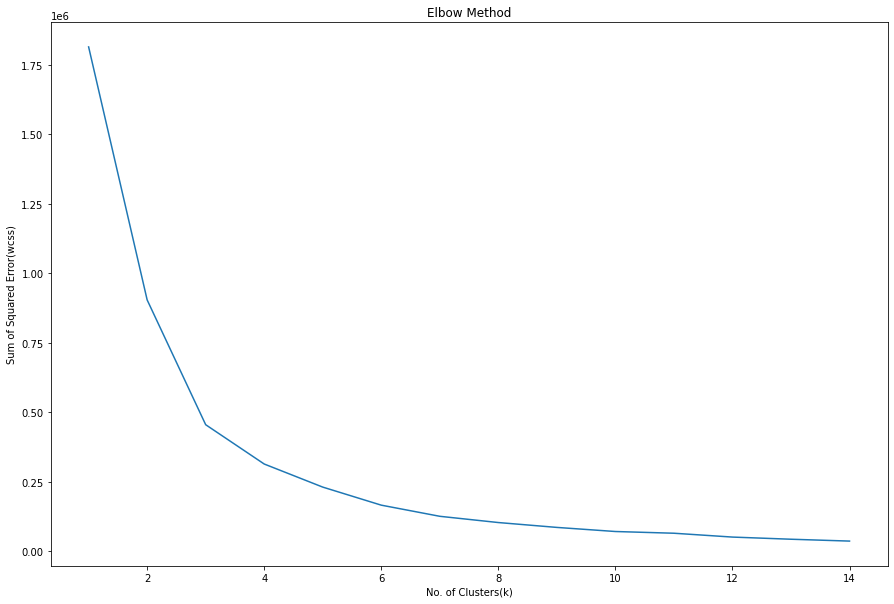

In [24]:
plt.figure(figsize=(15,10))
plt.plot(k,wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters(k)")
plt.ylabel("Sum of Squared Error(wcss)")
plt.show()


In [25]:
#No. of clusters = 4
kmeans = KMeans(n_clusters=6)
x_predict = kmeans.fit_predict(x)
x_predict



array([2, 1, 2, 5, 4, 0, 4, 1, 5, 2, 5, 1, 2, 2, 1, 2, 2, 4, 1, 4, 1, 2,
       1, 2, 2, 2, 5, 5, 1, 1, 1, 5, 5, 0, 4, 5, 1, 2, 5, 5, 2, 1, 2, 4,
       4, 5, 5, 2, 0, 5, 5, 3, 1, 2, 2, 4, 1, 4, 1, 2, 1, 2, 2, 5, 2, 2,
       4, 2, 4, 2, 1, 2, 2, 2, 1, 1, 2, 4, 5, 2, 5, 2, 4, 5, 5, 1, 2, 5,
       2, 5, 5, 4, 5, 2, 1, 5, 1, 5, 5, 5, 5, 5, 2])

In [26]:
df['cluster'] = x_predict
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,cluster
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,2
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,1
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,2
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,FWD,Type 2 CCS,Hatchback,C,5,45000,5
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,AWD,Type 2 CCS,SUV,E,5,96050,5
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,AWD,Type 2 CCS,Hatchback,C,5,50000,5
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,AWD,Type 2 CCS,Hatchback,C,5,65000,5


In [27]:
kmeans.cluster_centers_

array([[203.33333333, 645.        ],
       [153.22727273, 250.90909091],
       [207.64705882, 421.17647059],
       [410.        , 970.        ],
       [136.28571429, 160.71428571],
       [175.79310345, 341.37931034]])

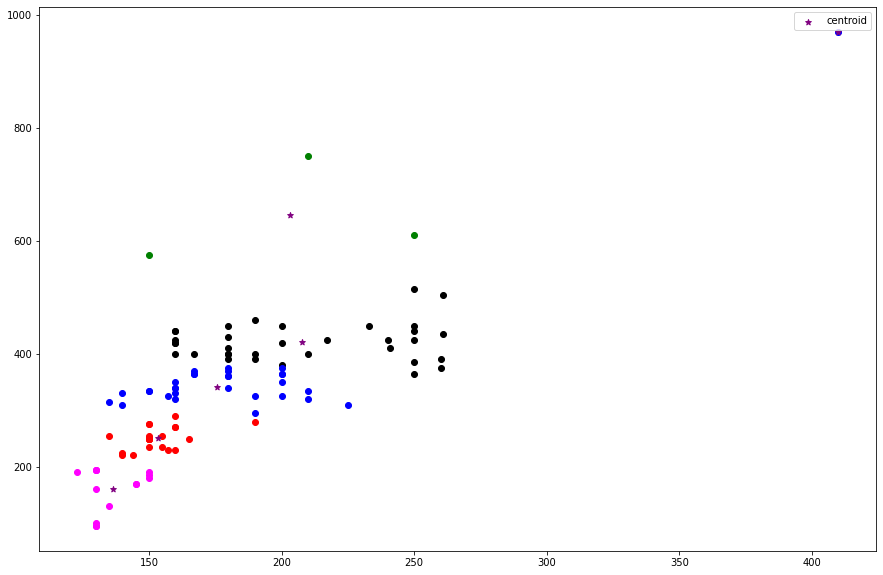

In [28]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.figure(figsize=(15,10))
plt.scatter(df1['TopSpeed_KmH'],df1['Range_Km'],color='green')
plt.scatter(df2['TopSpeed_KmH'],df2['Range_Km'],color='red')
plt.scatter(df3['TopSpeed_KmH'],df3['Range_Km'],color='black')
plt.scatter(df4['TopSpeed_KmH'],df4['Range_Km'],color='blue')
plt.scatter(df5['TopSpeed_KmH'],df5['Range_Km'],color='magenta')
plt.scatter(df6['TopSpeed_KmH'],df6['Range_Km'],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = 'purple',marker='*',label='centroid')
plt.legend()
plt.show()


